In [39]:
#importing our dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from pathlib import Path

from sklearn.linear_model import LinearRegression

## Filtering and Processing Data

In [40]:
#import flights_csv
flights_df = pd.read_csv('Resources/flights_update.csv')
flights_df.head(20)

,MONTH,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE_Miles,MINUTES_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,1448,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,2330,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,2296,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,2342,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,1448,-21.0
5,1,1,4,DL,806,N3730B,SFO,MSP,1589,8.0
6,1,1,4,NK,612,N635NK,LAS,MSP,1299,-17.0
7,1,1,4,US,2013,N584UW,LAX,CLT,2125,-10.0
8,1,1,4,AA,1112,N3LAAA,SFO,DFW,1464,-13.0
9,1,1,4,DL,1173,N826DN,LAS,ATL,1747,-15.0


In [41]:
#check dtypes
flights_df.dtypes

MONTH                    int64
DATE                     int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
DISTANCE_Miles           int64
MINUTES_DELAY          float64
dtype: object

In [42]:
#using minutes_delayed as y value, has to be int
flights_df['MINUTES_DELAY'] = flights_df['MINUTES_DELAY'].values.astype(np.int64)

In [43]:
#checking dtypes again
flights_df.dtypes

MONTH                   int64
DATE                    int64
DAY_OF_WEEK             int64
AIRLINE                object
FLIGHT_NUMBER           int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
DISTANCE_Miles          int64
MINUTES_DELAY           int64
dtype: object

In [44]:
#drop columns SORRY MU COMPUTER SUCKS, ADD COLUMNS BACK IN 
flights_df = flights_df.drop([ 'TAIL_NUMBER', ], axis=1)
flights_df

,MONTH,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE_Miles,MINUTES_DELAY
0,1,1,4,AS,98,ANC,SEA,1448,-22
1,1,1,4,AA,2336,LAX,PBI,2330,-9
2,1,1,4,US,840,SFO,CLT,2296,5
3,1,1,4,AA,258,LAX,MIA,2342,-9
4,1,1,4,AS,135,SEA,ANC,1448,-21
...,...,...,...,...,...,...,...,...,...
1048570,3,10,2,EV,4122,RDU,EWR,416,-16
1048571,3,10,2,UA,1018,LGA,IAH,1416,-2
1048572,3,10,2,UA,1260,SAN,ORD,1723,3
1048573,3,10,2,EV,4349,MSY,ORD,837,-13


In [45]:
flights_df['IS_Delayed'] = np.where(flights_df['MINUTES_DELAY']<= 0, '0', '1')
flights_df.head(20)

,MONTH,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE_Miles,MINUTES_DELAY,IS_Delayed
0,1,1,4,AS,98,ANC,SEA,1448,-22,0
1,1,1,4,AA,2336,LAX,PBI,2330,-9,0
2,1,1,4,US,840,SFO,CLT,2296,5,1
3,1,1,4,AA,258,LAX,MIA,2342,-9,0
4,1,1,4,AS,135,SEA,ANC,1448,-21,0
5,1,1,4,DL,806,SFO,MSP,1589,8,1
6,1,1,4,NK,612,LAS,MSP,1299,-17,0
7,1,1,4,US,2013,LAX,CLT,2125,-10,0
8,1,1,4,AA,1112,SFO,DFW,1464,-13,0
9,1,1,4,DL,1173,LAS,ATL,1747,-15,0


In [46]:
#drop columns SORRY MU COMPUTER SUCKS, ADD COLUMNS BACK IN 
#flights_df = flights_df.drop([ 'MINUTES_DELAY', ], axis=1)
#flights_df

In [47]:
#new_flights_df datatypes to make sure the minutes_delayed is int
#new_flights_df.dtypes

In [48]:
#unque values
#new_flights_df.nunique()

## Get Dummies

In [49]:
new_flights_encoded = pd.get_dummies(flights_df, columns=["AIRLINE"])
new_flights_encoded.head()

,MONTH,DATE,DAY_OF_WEEK,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE_Miles,MINUTES_DELAY,IS_Delayed,AIRLINE_AA,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,1,1,4,98,ANC,SEA,1448,-22,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,2336,LAX,PBI,2330,-9,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,840,SFO,CLT,2296,5,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,4,258,LAX,MIA,2342,-9,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,135,SEA,ANC,1448,-21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
OA_counts = flights_df.ORIGIN_AIRPORT.value_counts()
OA_counts

ATL    66599
ORD    52961
DFW    50933
LAX    38473
DEN    38254
       ...  
UST       33
BGR       22
PPG       21
ADK       20
ITH        6
Name: ORIGIN_AIRPORT, Length: 315, dtype: int64

In [51]:
# Determine which values to replace if counts are less than ...?
replace_OA = list(OA_counts[OA_counts <22574].index)
# Replace in dataframe
for app in replace_OA:
    flights_df.ORIGIN_AIRPORT = flights_df.ORIGIN_AIRPORT.replace(app,"Other")
# Check to make sure binning was successful
flights_df.ORIGIN_AIRPORT.value_counts()

Other    665482
ATL       66599
ORD       52961
DFW       50933
LAX       38473
DEN       38254
IAH       29802
PHX       29262
SFO       28428
LAS       25806
MCO       22575
Name: ORIGIN_AIRPORT, dtype: int64

In [52]:
DA_counts = flights_df.DESTINATION_AIRPORT.value_counts()
DA_counts.head(10)

ATL    66741
ORD    53060
DFW    51037
LAX    38463
DEN    38300
IAH    29820
PHX    29250
SFO    28437
LAS    25804
MCO    22586
Name: DESTINATION_AIRPORT, dtype: int64

In [53]:
# Determine which values to replace if counts are less than ...?
replace_DA = list(DA_counts[DA_counts <22584].index)

# Replace in dataframe
for app in replace_DA:
    flights_df.DESTINATION_AIRPORT = flights_df.DESTINATION_AIRPORT.replace(app,"Other")
    
# Check to make sure binning was successful
flights_df.DESTINATION_AIRPORT.value_counts()


Other    665077
ATL       66741
ORD       53060
DFW       51037
LAX       38463
DEN       38300
IAH       29820
PHX       29250
SFO       28437
LAS       25804
MCO       22586
Name: DESTINATION_AIRPORT, dtype: int64

In [54]:
# Generate our categorical variable lists
flight_cat = flights_df.dtypes[flights_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
flights_df[flight_cat].nunique()

AIRLINE                14
ORIGIN_AIRPORT         11
DESTINATION_AIRPORT    11
IS_Delayed              2
dtype: int64

In [55]:
#sample only 100K rows for machine learning
#new_flights_df = flights_df.sample(n = 100000)


## Functions to make data ready for machine learning

In [56]:
# one Hot Encoder
def onehot_encode(flights_df, column_dict):
    flights_df = flights_df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(flights_df[column], prefix=prefix)
        flights_df = pd.concat([flights_df, dummies], axis=1)
        flights_df = flights_df.drop(column, axis=1)
        
    return flights_df
        
  

In [57]:
flights_df

,MONTH,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE_Miles,MINUTES_DELAY,IS_Delayed
0,1,1,4,AS,98,Other,Other,1448,-22,0
1,1,1,4,AA,2336,LAX,Other,2330,-9,0
2,1,1,4,US,840,SFO,Other,2296,5,1
3,1,1,4,AA,258,LAX,Other,2342,-9,0
4,1,1,4,AS,135,Other,Other,1448,-21,0
...,...,...,...,...,...,...,...,...,...,...
1048570,3,10,2,EV,4122,Other,Other,416,-16,0
1048571,3,10,2,UA,1018,Other,IAH,1416,-2,0
1048572,3,10,2,UA,1260,Other,ORD,1723,3,1
1048573,3,10,2,EV,4349,Other,ORD,837,-13,0


In [58]:
#some functions to help 
#first were gonna make a copy of the flights_df

def preprocessing_inputs(flights_df):
    flights_df = flights_df.copy()
    
    #one-hot encoder nominal feature columns
    flights_df = onehot_encode(
        flights_df,
        column_dict={
            'AIRLINE': 'AL',
            'ORIGIN_AIRPORT': 'OA',
            'DESTINATION_AIRPORT': 'DA'
        })
    
    #fill remaining missing values with columns means
    #Makes everything numaric and fills in null values
    remaining_na_columns = flights_df.loc[:, flights_df.isna().sum() > 0].columns
    for column in remaining_na_columns:
        flights_df[column] = flights_df[column].fillna(flights_df[column].mean())
        
    #training the data in X and y
    #I CHANGED IT TO MINUTES_DELAYED, HE HAD IT AS THE 'CANCELLED' COLUMN WITH WE REMOVED
    #Maybe thats why it wont show anything??

    y = flights_df['IS_Delayed'].copy()
    X = flights_df.drop('IS_Delayed', axis=1).copy()
    
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=123)
    
    #scaling the data with standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns= X.columns)
    
    return X_train, X_test, y_train, y_test


In [59]:
def evaluate_model(model, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Test Accuracy: {:.2f}%".format(model_acc * 100))
    
    #confusion matrix
    y_true = np.array(y_test)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred)
    
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2) + 0.5, ["ON TIME", "DELAYED"])
    plt.yticks(np.arange(2) + 0.5, ["ON TIME", "DELAYED"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [60]:
#checking dtypes again
flights_df.dtypes

MONTH                   int64
DATE                    int64
DAY_OF_WEEK             int64
AIRLINE                object
FLIGHT_NUMBER           int64
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
DISTANCE_Miles          int64
MINUTES_DELAY           int64
IS_Delayed             object
dtype: object

In [61]:
X_train, X_test, y_train, y_test = preprocessing_inputs(flights_df)

In [62]:
X_train

,MONTH,DATE,DAY_OF_WEEK,FLIGHT_NUMBER,DISTANCE_Miles,MINUTES_DELAY,AL_AA,AL_AS,AL_B6,AL_DL,...,DA_DEN,DA_DFW,DA_IAH,DA_LAS,DA_LAX,DA_MCO,DA_ORD,DA_Other,DA_PHX,DA_SFO
0,-0.983603,-0.896267,-0.977100,0.109750,-0.935941,0.206412,3.127956,-0.170901,-0.219432,-0.405215,...,-0.194438,4.431462,-0.170457,-0.158367,-0.195746,-0.148239,-0.230495,-1.317134,-0.169908,-0.167476
1,-0.983603,1.054014,0.522299,-0.560176,0.914992,0.206412,-0.319698,-0.170901,-0.219432,-0.405215,...,-0.194438,-0.225659,-0.170457,-0.158367,-0.195746,-0.148239,-0.230495,0.759224,-0.169908,-0.167476
2,0.434185,-0.896267,0.522299,-0.565731,1.243411,0.206412,-0.319698,-0.170901,-0.219432,2.467824,...,-0.194438,-0.225659,-0.170457,-0.158367,-0.195746,-0.148239,-0.230495,-1.317134,-0.169908,-0.167476
3,-0.983603,1.398181,-1.476899,-0.941801,-0.179736,0.206412,-0.319698,-0.170901,-0.219432,-0.405215,...,-0.194438,-0.225659,-0.170457,-0.158367,-0.195746,-0.148239,-0.230495,-1.317134,-0.169908,-0.167476
4,0.434185,-1.469879,1.521898,-0.549622,2.442560,0.206412,-0.319698,-0.170901,-0.219432,-0.405215,...,-0.194438,-0.225659,-0.170457,-0.158367,-0.195746,-0.148239,-0.230495,0.759224,-0.169908,-0.167476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629140,-0.983603,-0.093210,-0.977100,-1.104561,1.593724,0.206412,-0.319698,-0.170901,-0.219432,-0.405215,...,-0.194438,-0.225659,-0.170457,6.314440,-0.195746,-0.148239,-0.230495,-1.317134,-0.169908,-0.167476
629141,-0.983603,-1.355156,0.522299,1.085197,-0.098895,0.206412,-0.319698,-0.170901,-0.219432,-0.405215,...,-0.194438,-0.225659,5.866588,-0.158367,-0.195746,-0.148239,-0.230495,-1.317134,-0.169908,-0.167476
629142,-0.983603,-1.355156,0.522299,1.158523,-1.013414,0.206412,-0.319698,-0.170901,-0.219432,-0.405215,...,-0.194438,-0.225659,5.866588,-0.158367,-0.195746,-0.148239,-0.230495,-1.317134,-0.169908,-0.167476
629143,-0.983603,0.595125,-1.476899,-0.781818,3.156659,0.206412,-0.319698,5.851352,-0.219432,-0.405215,...,-0.194438,-0.225659,-0.170457,-0.158367,-0.195746,-0.148239,-0.230495,0.759224,-0.169908,-0.167476


In [63]:
y_train.value_counts()

0    374402
1    254743
Name: IS_Delayed, dtype: int64

## Logistical Regression and other Machine Learning

In [64]:
#APPARENTLLY THIS IS STILL TOO MUCH DATA IDK HOW TO FIX
#UNLESS ITS MY COMPUTER
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Test Accuracy: 61.23%


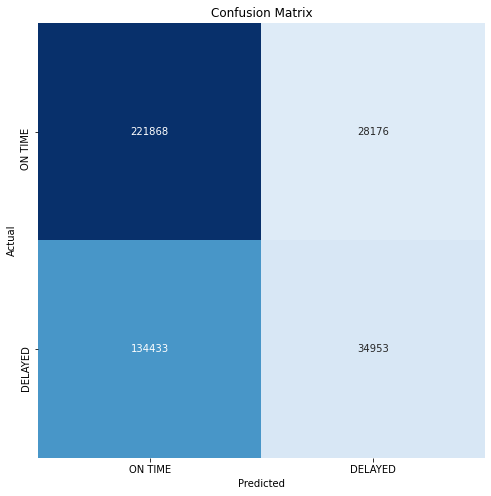

In [65]:
evaluate_model(model, X_test, y_test)

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=75)
classifier

LogisticRegression(max_iter=1000, random_state=75)

In [67]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=1000, multi_class='warn', penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(max_iter=1000, multi_class='warn', penalty='12',
                   random_state=1)

In [68]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=75)

In [69]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6105794371726708
Testing Data Score: 0.6123095629783277
